# Credit Card Fraud Detection
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
**The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.**

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. **Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'**. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.**


# Import Libraries

In [53]:
'''Main'''
import numpy as np
import pandas as pd
import os

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

'''Data Prep'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
# import lightgbm as lgb

In [ ]:
# Define functions to connect to Google and change directories
def connectDrive():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def changeDirectory(path):
    import os
    original_path = os.getcwd()
    os.chdir(path)
    new_path = os.getcwd()
    print("Original path: ",original_path)
    print("New path: ",new_path)

# Connect to Google Drive
connectDrive()

changeDirectory("/content/drive/MyDrive/上課/Data Mining")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-54-f6e9648d40f9>", line 17, in <cell line: 0>
    changeDirectory("/content/drive/MyDrive/上課/Data Mining")
  File "<ipython-input-54-f6e9648d40f9>", line 8, in changeDirectory
    original_path = os.getcwd()
                    ^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call la

In [ ]:
# Change path


# Data Preparation

In [ ]:
# Acquire Data
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'credit_card.csv'])
print(file)
data = pd.read_csv(current_path + file)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-55-aa9cf6c227d6>", line 2, in <cell line: 0>
    current_path = os.getcwd()
                   ^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_

In [ ]:
# Explore Data
data.shape

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.columns

In [ ]:
print("Number of fraudulent transactions:", data['Class'].sum())

In [ ]:
np.bincount(data['Class'])

In [ ]:
nanCounter = np.isnan(data).sum()

In [ ]:
np.isnan(data)

In [ ]:
nanCounter

In [ ]:
distinctCounter = data.apply(lambda x: len(x.unique()))

In [ ]:
distinctCounter

In [ ]:
# Generate feature matrix and labels array
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [ ]:
dataX.describe()

In [ ]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [ ]:
correlationMatrix

In [ ]:
correlation_file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'correlationMatrix.csv'])
correlationMatrix.to_csv(current_path+correlation_file)

In [ ]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
print(count_classes)
print(count_classes/len(data))
ax = sns.barplot(x=count_classes.index, y=[tuple(count_classes/len(data))[0],tuple(count_classes/len(data))[1]])
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

# Model Preparation

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataX,
                                    dataY, test_size=0.33,
                                    random_state=2022, stratify=dataY)
## stratify=dataY 讓各類別在 train 和 test 的比例維持一致 (特別是資料是unbalanced data時)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
total_fraud=data['Class'].sum()
total_fraud

In [ ]:
y_train.sum()/total_fraud

In [ ]:
y_test.sum()/total_fraud

# Feature scaling

In [ ]:
# Feature scaling
featuresToScale = dataX.drop(['Time'],axis=1).columns

In [ ]:
featuresToScale

In [ ]:
# Suppress warnings
pd.set_option('mode.chained_assignment', None)

sX = pp.StandardScaler(copy=True)
X_train.loc[:,featuresToScale] = sX.fit_transform(X_train.loc[:,featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

X_test.loc[:,featuresToScale] = sX.transform(X_test.loc[:,featuresToScale])

In [ ]:
scalingFactors

In [ ]:
X_train.head()

# StratifiedKFold: Stratification based on class labels

StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

![image.png](attachment:image.png)

## K-fold

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [5, 6], [10, 11],[12, 13],[14, 15]])
y = np.array([0, 0, 0, 1, 1 ,1])


In [ ]:
#傳回切割的索引位置
kf=KFold(n_splits=3)#, shuffle=True)
for train_index, test_index in kf.split(X):
    print(train_index)
    print(test_index)

In [ ]:
kf=KFold(n_splits=3)#, shuffle=True)

for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Valid:", test_index)
    X_train_, X_test_ = X[train_index], X[test_index]
    y_train_, y_test_ = y[train_index], y[test_index]
    print(X_train_, y_train_)
    print(X_test_, y_test_)
    print('--------------')


## Stratified K-Fold

In [ ]:
y.ravel()

In [ ]:
sk_fold = StratifiedKFold(n_splits=3)#shuffle=True)
for train_index, test_index in sk_fold.split(X,y.ravel()):
    print("Train:", train_index, "Valid:", test_index)
    X_train_, X_test_ = X[train_index], X[test_index]
    y_train_, y_test_ = y[train_index], y[test_index]
    print(X_train_, y_train_)
    print(X_test_, y_test_)
    print('--------------')

# Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**Class weight**: 數量少的類別, 給予較高權重。n_samples / (n_classes * np.bincount(y))。

**Log loss**:  aka logistic loss or binary cross-entropy loss.https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

![image-2.png](attachment:image-2.png)

![image-3.png](attachment:image-3.png)
**sklearn.metrics.log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)**

**predict_proba(X)**: returned estimates for all classes are ordered by the label of classes.




In [ ]:
penalty = 'l2'
C = 1.0

#class_weight = None
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C,
            class_weight=class_weight, random_state=random_state,
                            solver=solver, n_jobs=n_jobs)

In [ ]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])
predictionsBasedOnKFolds

In [ ]:
k_fold = StratifiedKFold(n_splits=10,random_state=2022,shuffle=True)
k_fold

model = logReg

for train_index, cv_index in k_fold.split(X_train,y_train.ravel()):

    print(len(X_train),len(train_index),len(cv_index))
    #print(X_cv_fold.index[:5])

    #train folds---------------
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    model.fit(X_train_fold, y_train_fold)
    #calculate logstic loss of train
    loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)

    # fill predition result {not fraud, fraud} into the  cv fold------------------
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    #calculate logstic loss of cv
    cvScores.append(loglossCV)

    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)


print('---------------')
loglossLogisticRegression = log_loss(y_train,
                                     predictionsBasedOnKFolds.loc[:,1]) # column 1 : predict whether it's a fraud
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

In [ ]:
predictionsBasedOnKFolds

# Evaluation Methods for Imblacned Data Classification


## precision recall curve
Compute precision-recall pairs for different probability thresholds.


In [46]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()
predictionsBasedOnKFoldsLogisticRegression

,trueLabel,prediction
182264,0,0.03148
113153,0,0.081209
46303,0,0.013185
156603,0,0.014996
258117,0,0.002099
...,...,...
80530,0,0.000966
247532,0,0.000262
135761,0,0.015008
273792,0,0.032245


In [47]:
precision, recall, _ = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])


In [48]:
print(len(precision))
print(len(recall))

190567
190567


In [49]:
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.75')

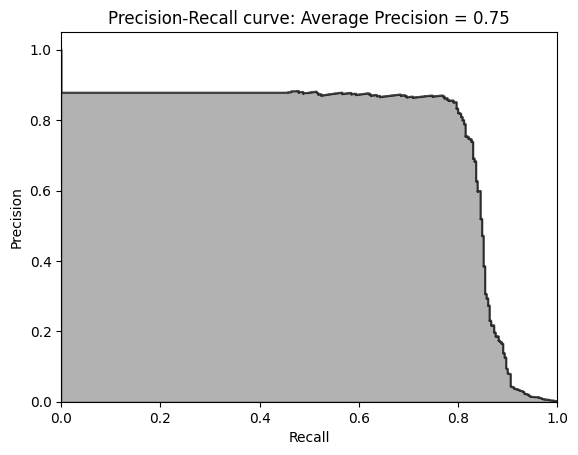

In [50]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

## AUC

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_curve#sklearn.metrics.roc_curve

In [51]:
fpr, tpr, _ = roc_curve(preds['trueLabel'],preds['prediction'])


In [52]:
fpr

array([0.00000000e+00, 1.10242007e-04, 1.10242007e-04, 1.10242007e-04,
       1.10242007e-04, 1.15491627e-04, 1.15491627e-04, 1.20741246e-04,
       1.20741246e-04, 1.20741246e-04, 1.25990866e-04, 1.31240485e-04,
       1.31240485e-04, 1.36490104e-04, 1.36490104e-04, 1.41739724e-04,
       1.41739724e-04, 1.46989343e-04, 1.46989343e-04, 1.52238963e-04,
       1.52238963e-04, 1.57488582e-04, 1.57488582e-04, 1.62738201e-04,
       1.62738201e-04, 1.67987821e-04, 1.67987821e-04, 1.73237440e-04,
       1.73237440e-04, 1.78487060e-04, 1.78487060e-04, 1.83736679e-04,
       1.83736679e-04, 1.88986298e-04, 1.88986298e-04, 1.94235918e-04,
       1.94235918e-04, 1.99485537e-04, 1.99485537e-04, 2.04735157e-04,
       2.04735157e-04, 2.15234396e-04, 2.15234396e-04, 2.25733634e-04,
       2.25733634e-04, 2.30983254e-04, 2.30983254e-04, 2.41482493e-04,
       2.41482493e-04, 2.78229828e-04, 2.78229828e-04, 3.04477925e-04,
       3.04477925e-04, 3.09727545e-04, 3.09727545e-04, 3.30726022e-04,
      

In [ ]:
areaUnderROC = auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Random Forests

In [ ]:
n_estimators = 10
max_features = None
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators,
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,
        class_weight=class_weight)

In [ ]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]

    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)

    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

loglossRandomForestsClassifier = log_loss(y_train,
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.00040876437272217565
CV Log Loss:  0.012018394254531316
Training Log Loss:  0.0003893211249561648
CV Log Loss:  0.012483585397621106
Training Log Loss:  0.00042548559653092836
CV Log Loss:  0.006593094947131235
Training Log Loss:  0.00042166566380160694
CV Log Loss:  0.004326026094909843
Training Log Loss:  0.00044181015493161127
CV Log Loss:  0.012095300332000932
Training Log Loss:  0.0004169707920578068
CV Log Loss:  0.010029196117967753
Training Log Loss:  0.000384876983588489
CV Log Loss:  0.017464928018242495
Training Log Loss:  0.000390803697970995
CV Log Loss:  0.012017903430937945
Training Log Loss:  0.00039673823028860914
CV Log Loss:  0.012405690950442973
Training Log Loss:  0.00035817772479500624
CV Log Loss:  0.020058708588072367
Random Forests Log Loss:  0.011949282813185799


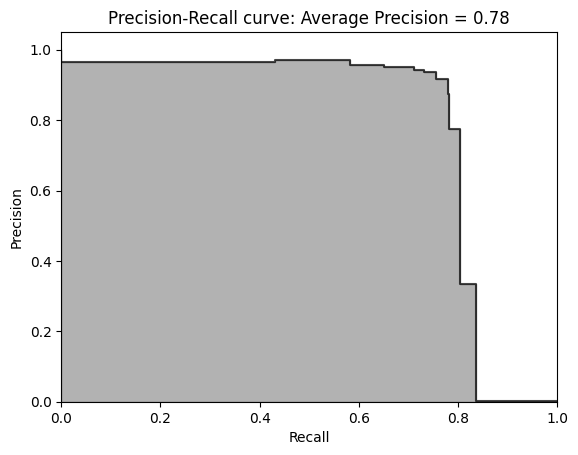

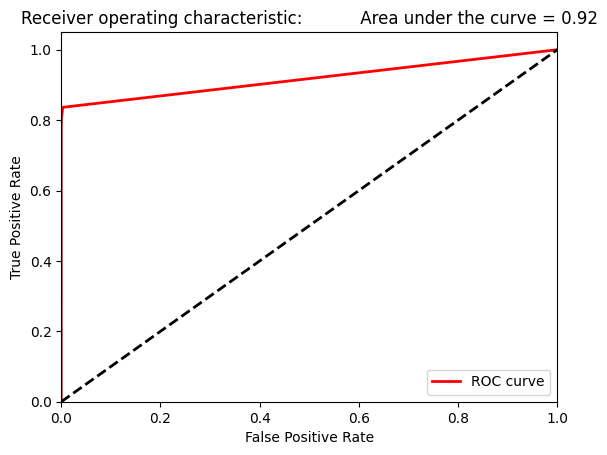

In [ ]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Test Set Evaluation

In [ ]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-83-19f79ed87de7>", line 4, in <cell line: 4>
    logReg.predict_proba(X_test)[:,1]
NameError: name 'logReg' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPy

In [ ]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

In [ ]:
# predictionsTestSetXGBoostGradientBoosting = \
#     pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
# dtest = xgb.DMatrix(data=X_test)
# predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
#     bst.predict(dtest)
# logLossTestSetXGBoostGradientBoosting = \
#     log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [ ]:
print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-85-39f237b30f34>", line 2, in <cell line: 1>
    logLossTestSetLogisticRegression)
NameError: name 'logLossTestSetLogisticRegression' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/py

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-85-39f237b30f34>", line 2, in <cell line: 1>
    logLossTestSetLogisticRegression)
NameError: name 'logLossTestSetLogisticRegression' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/

## PR Curve and AUC for  Logistic Regression0

In [ ]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-85-b3de50c387ea>", line 2, in <cell line: 2>
    precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 952, in precision_recall_curve
    fps, tps, thresholds = _binary_clf_curve(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 810, in _binary_clf_curve
    assert_all_finite(y_score)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 200, in assert_all_finite
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 107, in _a

## PRCurve and AUC for  Random Forests

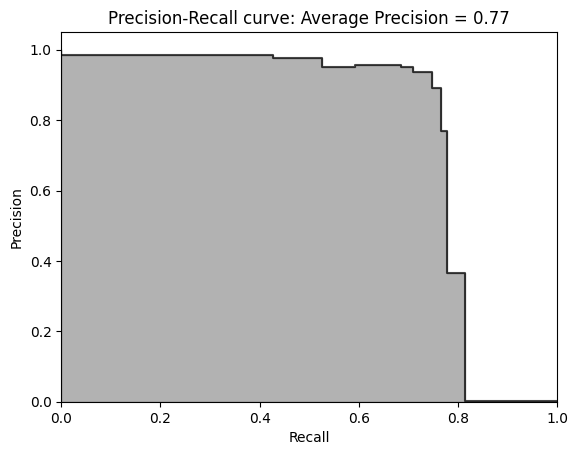

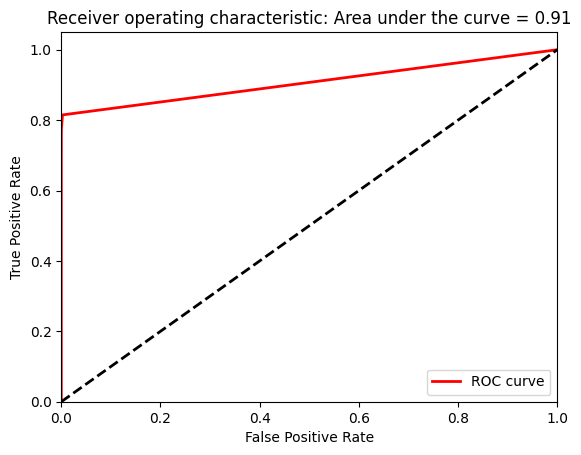

In [ ]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = \
    average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Excercise


##  sub-Sample in order to deal with Imbalanced Datasets


In [ ]:
# Explore Data
data.shape

(284807, 31)

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

data = data.sample(frac=1) # fraction=100% , it just shuffle

# amount of fraud classes 492 rows.
fraud_df = data.loc[data['Class'] == 1]  # 492rows
non_fraud_df = data.loc[data['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
#normal_distributed_df

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
126402,78000.0,0.763702,-1.387960,-0.765772,-0.703955,1.079977,3.842591,-0.907413,0.949725,0.743292,...,0.179937,-0.081072,-0.298845,1.109595,0.274852,1.095406,-0.083558,0.054972,274.30,0
199896,133184.0,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,-1.703378,...,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1335.00,1
155383,105280.0,-0.440846,0.833704,1.929558,-0.399972,0.781189,0.523301,0.539025,-0.174733,1.443750,...,-0.351247,-0.571838,-0.348831,-0.054483,0.411187,-0.720301,-0.084202,-0.144127,11.27,0
70141,53727.0,-1.649279,1.263974,-1.050826,2.237991,-2.527889,-0.889940,-2.355254,0.854659,-1.281243,...,0.679176,0.731907,0.333045,0.392505,-0.274197,0.802349,0.390809,0.112146,112.45,1
18466,29526.0,1.102804,2.829168,-3.932870,4.707691,2.937967,-1.800904,1.672734,-0.300240,-2.783011,...,-0.106994,-0.250050,-0.521627,-0.448950,1.291646,0.516327,0.009146,0.153318,0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235634,148476.0,-1.125092,3.682876,-6.556168,4.016731,-0.425571,-2.031210,-2.650137,1.131249,-2.946890,...,1.185580,1.348156,-0.053686,0.284122,-1.174469,-0.087832,0.718790,0.676216,0.76,1
68320,52934.0,1.036639,0.407227,0.757706,3.161821,-0.568122,0.202181,-0.689804,0.411380,0.336769,...,-0.050108,0.123761,-0.132568,0.350231,0.507701,0.189621,0.061016,0.063141,0.76,1
277748,167831.0,-0.080535,1.142512,-0.719559,-0.840104,1.164049,-0.213275,0.860151,0.083334,-0.069665,...,-0.357362,-0.849730,0.029428,-0.018366,-0.329493,0.133298,0.324866,0.128006,5.99,0
178208,123525.0,-5.904921,4.439911,-8.631802,7.788684,-4.989580,-1.200144,-7.674060,4.125761,-5.315778,...,1.775030,1.266441,-0.199410,0.014960,-0.000019,0.544210,-1.167566,-1.206354,45.51,1


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


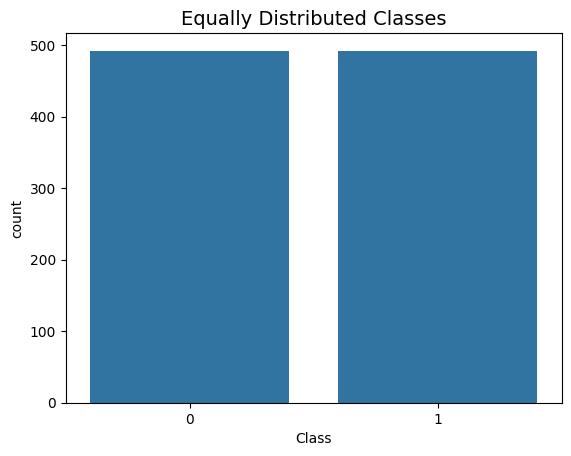

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot(x=new_df['Class'])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

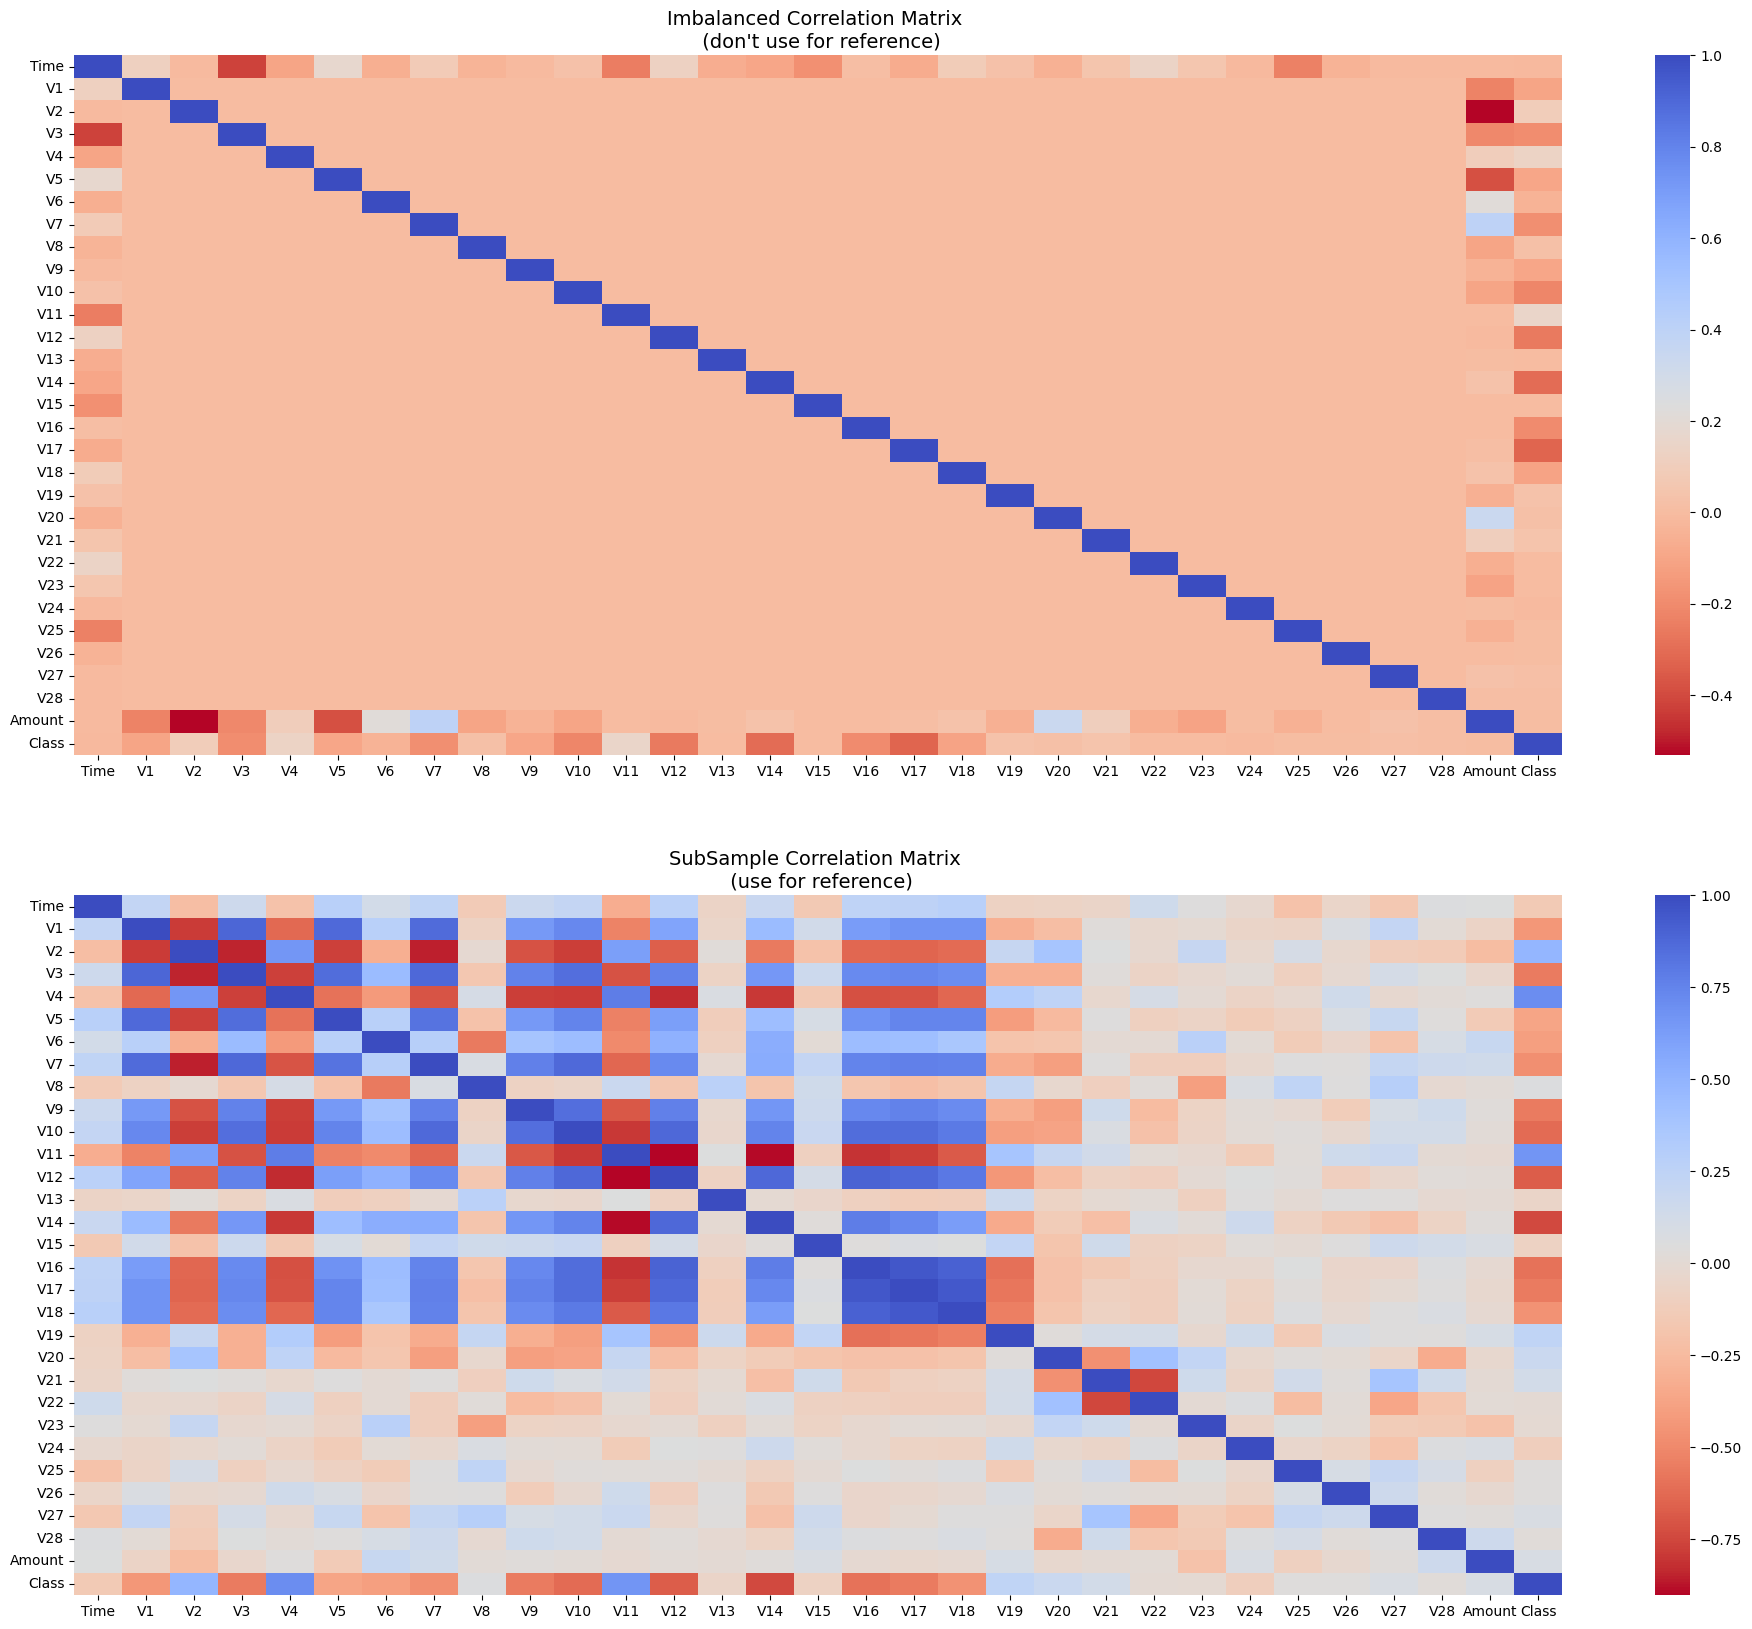

In [ ]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

## you can train model on the subsampling data and observe the result

# Conclusion